In [6]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [7]:
authors_data = pd.DataFrame.from_csv("D:\\Research\\Data\\soloauthors.tsv", sep='\t')
authors_data.head(5)

,lastname,fn,year,country,gender,ageY,ageN,abstract,ethnicities
PMID,,,,,,,,,
3917010,Seeman,nadrian,1985,USA,M,15,23,The simplest form of macromolecular design inv...,ENGLISH
3940060,Gorea,andrei,1985,FRANCE,M,9,7,Spatial integration characteristics were asses...,FRENCH-HISPANIC
3128160,Tippett,pa,1986,UK,F,29,118,"Two closely linked structural loci, D and 'CcE...",ENGLISH
3659720,Friedman,eileen,1987,USA,F,3,3,Colon carcinoma cells cocultured with adenoma ...,ENGLISH
3310230,Holliday,robin,1987,UK,N,26,87,Evidence from many sources shows that the cont...,ENGLISH


In [8]:
type(authors_data)

pandas.core.frame.DataFrame

##### Find which columns contain null values

In [9]:
authors_data.isnull().sum()

lastname       0
fn             4
year           0
country        0
gender         0
ageY           0
ageN           0
abstract       0
ethnicities    0
dtype: int64

In [10]:
authors_data.gender = authors_data.gender.astype('category')

In [8]:
authors_data.dtypes

lastname         object
fn               object
year              int64
country          object
gender         category
ageY             object
ageN             object
abstract         object
ethnicities      object
dtype: object

#### Ethnicity EDA

* The frequency of different Ethnicities is dominated by English (~118329).
* In the second tier we see German, Japanese, French, Hispanic, Nordic, Slav, Chinese with frequencies ranging from 20044 to 8201.

In [9]:
authors_data['ethnicities'].value_counts()[0:15]

ENGLISH           118329
GERMAN             20044
JAPANESE           13406
FRENCH             10620
HISPANIC           10249
NORDIC              8945
SLAV                8689
CHINESE             8201
ITALIAN             6126
ARAB                5762
INDIAN              5413
DUTCH               3908
ENGLISH-GERMAN      3847
GERMAN-ENGLISH      2938
ENGLISH-FRENCH      2922
Name: ethnicities, dtype: int64

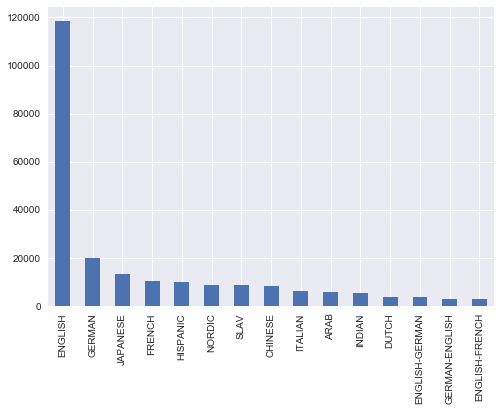

In [10]:
authors_data['ethnicities'].value_counts()[0:15].plot(kind = 'bar')
plt.show()

In [11]:
indx = authors_data.index

In [27]:
authors_data.abstract[indx[10]]

'This paper describes a number of epidemiological findings relating to the size of the back pain problem within nursing, its distribution across nursing specialties and the comparison of these data with other occupational groups. The extent of the problem within the nursing profession has been estimated through a number of research studies. Unfortunately these studies cannot be easily compared because of differing methodologies and criteria for identifying those with back pain and inconsistent use of prevalence and incidence data. Results from a study of 3912 NHS nurses are considered in detail as is the extent to which back pain is a contributory factor in the decision of nurses to leave the profession. The use of epidemiological methods to identify factors associated with the occurrence of the disorder has also been discussed, although the difficulty of quantifying exposure for factors such as postural requirements necessitates caution in their interpretation.'

In [13]:
import nltk

In [16]:
tokens = nltk.word_tokenize(authors_data.abstract[indx[3]])
print(nltk.pos_tag(tokens))

[('Colon', 'NNP'), ('carcinoma', 'NN'), ('cells', 'NNS'), ('cocultured', 'VBN'), ('with', 'IN'), ('adenoma', 'NN'), ('cells', 'NNS'), ('were', 'VBD'), ('examined', 'VBN'), ('under', 'IN'), ('various', 'JJ'), ('experimental', 'JJ'), ('conditions', 'NNS'), ('.', '.'), ('Carcinoma', 'NNP'), ('cells', 'NNS'), ('were', 'VBD'), ('shown', 'VBN'), ('to', 'TO'), ('have', 'VB'), ('a', 'DT'), ('selective', 'JJ'), ('advantage', 'NN'), ('over', 'IN'), ('adenoma', 'JJ'), ('cells', 'NNS'), ('.', '.'), ('This', 'DT'), ('advantage', 'NN'), ('is', 'VBZ'), ('enhanced', 'VBN'), ('by', 'IN'), ('exposure', 'NN'), ('to', 'TO'), ('a', 'DT'), ('tumor', 'NN'), ('promoter', 'NN'), ('.', '.')]


In [1]:
import pickle

In [2]:
with open("D:\\Research\\Data\\FunctionWord_Merged.PICKLE", 'rb') as thefile:
    dict_fw = pickle.load(thefile)

In [34]:
def GetFrequencyofFW(abstract):
    tokens = nltk.word_tokenize(abstract)
    dict_tokens_fw = dict()
    dict_tokens_content = dict()
    for t in tokens:
        if t in dict_fw:
            if t in dict_tokens_fw:
                dict_tokens_fw[t] += 1
            else:
                dict_tokens_fw[t] = 1
        else:
            if t in dict_tokens_content:
                dict_tokens_content[t] += 1
            else:
                dict_tokens_content[t] = 1
    print(tokens)
    print(dict_tokens_content)
    return dict_tokens_fw

In [35]:
GetFrequencyofFW(authors_data.abstract[indx[10]])

['This', 'paper', 'describes', 'a', 'number', 'of', 'epidemiological', 'findings', 'relating', 'to', 'the', 'size', 'of', 'the', 'back', 'pain', 'problem', 'within', 'nursing', ',', 'its', 'distribution', 'across', 'nursing', 'specialties', 'and', 'the', 'comparison', 'of', 'these', 'data', 'with', 'other', 'occupational', 'groups', '.', 'The', 'extent', 'of', 'the', 'problem', 'within', 'the', 'nursing', 'profession', 'has', 'been', 'estimated', 'through', 'a', 'number', 'of', 'research', 'studies', '.', 'Unfortunately', 'these', 'studies', 'can', 'not', 'be', 'easily', 'compared', 'because', 'of', 'differing', 'methodologies', 'and', 'criteria', 'for', 'identifying', 'those', 'with', 'back', 'pain', 'and', 'inconsistent', 'use', 'of', 'prevalence', 'and', 'incidence', 'data', '.', 'Results', 'from', 'a', 'study', 'of', '3912', 'NHS', 'nurses', 'are', 'considered', 'in', 'detail', 'as', 'is', 'the', 'extent', 'to', 'which', 'back', 'pain', 'is', 'a', 'contributory', 'factor', 'in', 't

{'also': 1,
 'although': 1,
 'and': 4,
 'are': 1,
 'as': 2,
 'be': 1,
 'because': 1,
 'been': 2,
 'can': 1,
 'considered': 1,
 'data': 2,
 'difficulty': 1,
 'discussed': 1,
 'for': 2,
 'from': 1,
 'has': 2,
 'in': 3,
 'is': 2,
 'its': 1,
 'of': 12,
 'other': 1,
 'such': 1,
 'the': 11,
 'their': 1,
 'these': 2,
 'those': 1,
 'to': 4,
 'use': 2,
 'which': 1,
 'with': 3,
 'within': 2}

In [30]:
authors_data.abstract[indx[10]]

'This paper describes a number of epidemiological findings relating to the size of the back pain problem within nursing, its distribution across nursing specialties and the comparison of these data with other occupational groups. The extent of the problem within the nursing profession has been estimated through a number of research studies. Unfortunately these studies cannot be easily compared because of differing methodologies and criteria for identifying those with back pain and inconsistent use of prevalence and incidence data. Results from a study of 3912 NHS nurses are considered in detail as is the extent to which back pain is a contributory factor in the decision of nurses to leave the profession. The use of epidemiological methods to identify factors associated with the occurrence of the disorder has also been discussed, although the difficulty of quantifying exposure for factors such as postural requirements necessitates caution in their interpretation.'

In [33]:
indx[10]

2961710